In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("../input/railway-data-imageslabels-incsv/Railway_data_images+labels/train.csv", index_col = 0)
train.head()

,images,labels
0,2007.05.16_-_002_Broken_rail_weld_-_Flickr_-_f...,Defective
1,2007.05.16_-_002_Broken_rail_weld_-_Flickr_-_f...,Defective
2,6411009.jpg,Defective
3,89e8b1a9ca8c41919021f8f4faaf37f0.jpg,Defective
4,aug_prefix_0_1047.jpg,Defective


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  701 non-null    object
 1   labels  701 non-null    object
dtypes: object(2)
memory usage: 16.4+ KB


In [3]:
train["labels"].unique()

array(['Defective', 'Non Defective'], dtype=object)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
 #Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
train['labels']= label_encoder.fit_transform(train['labels'])
 
train['labels'].unique()

array([0, 1])

In [6]:
list(label_encoder.inverse_transform([0]))

['Defective']

In [7]:
train["labels"].value_counts()

0    354
1    347
Name: labels, dtype: int64

In [8]:
import os 

train_image = []

#Y = []

data_dir = '../input/railway-data-imageslabels-incsv/Railway_data_images+labels'
image_list = train['images'].to_list()

for im_name in tqdm(image_list):
    path = os.path.join(data_dir, im_name)
    img = image.load_img(path, target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    #Y.append(train['diseasetype'][i])

#Y = np.array(Y)
X = np.array(train_image)

100%|██████████| 701/701 [01:36<00:00,  7.23it/s]


In [9]:
X.shape

(701, 400, 400, 3)

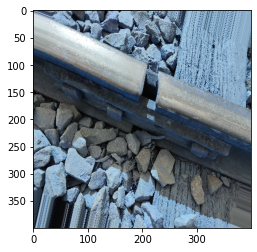

In [10]:
plt.imshow(X[570])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


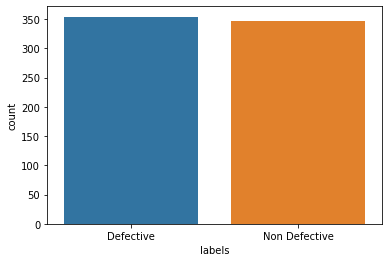

In [11]:
import seaborn as sns
# visualize the target variable
g = sns.countplot(train['labels'])
g.set_xticklabels(['Defective','Non Defective'])
plt.show()

In [12]:
Y = train['labels'].values

In [13]:
Y.shape

(701,)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify = Y)

In [15]:
Y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# inceptionResNet_V2

In [17]:
import tensorflow as tf
import keras
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
#from keras.applications.resnet import Inceptionresnetv2

#from tensorflow.keras.applications.resnet import ResNet152
# from keras.applications import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
model = InceptionResNetV2(include_top=False, input_shape=(400,400,3),weights="imagenet")

from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, SimpleRNN, LSTM, GRU, Reshape, Concatenate,Bidirectional
#from keras.applications.MobileNet import preprocess_input
from keras.applications.resnet import preprocess_input


from keras.layers import GaussianNoise
#local_weights_file = '../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
f1_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(400,400,3))
#f1_base.load_weights(local_weights_file)
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
#f1_x = Dense(1, activation='relu')(f1_x)
f1_x = Dense(1, activation='sigmoid')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())


2022-05-11 14:09:31.031491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 14:09:31.128612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 14:09:31.129345: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 14:09:31.130730: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

219070464/219055592 [==============================] - 12s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 199, 199, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 199, 199, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 199, 199, 32) 0           batch_normalization_203[0][0]    
__________________________

In [18]:
model_1.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
X.shape

(701, 400, 400, 3)

In [20]:
Y.shape

(701,)

In [21]:
Y_test.shape

(141,)

In [22]:
result = model_1.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=8, verbose=1)

2022-05-11 14:09:56.462332: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1075200000 exceeds 10% of free system memory.
2022-05-11 14:09:57.557149: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1075200000 exceeds 10% of free system memory.
2022-05-11 14:09:58.349505: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-11 14:10:14.319860: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


70/70 [==============================] - 50s 399ms/step - loss: 0.5891 - accuracy: 0.7625 - val_loss: 0.8182 - val_accuracy: 0.8794
Epoch 2/50
70/70 [==============================] - 24s 341ms/step - loss: 0.2747 - accuracy: 0.9089 - val_loss: 2.8873 - val_accuracy: 0.8156
Epoch 3/50
70/70 [==============================] - 24s 341ms/step - loss: 0.2081 - accuracy: 0.9304 - val_loss: 0.8387 - val_accuracy: 0.8865
Epoch 4/50
70/70 [==============================] - 24s 341ms/step - loss: 0.1272 - accuracy: 0.9571 - val_loss: 0.3716 - val_accuracy: 0.9220
Epoch 5/50
70/70 [==============================] - 24s 341ms/step - loss: 0.1306 - accuracy: 0.9589 - val_loss: 0.7080 - val_accuracy: 0.8085
Epoch 6/50
70/70 [==============================] - 24s 339ms/step - loss: 0.1285 - accuracy: 0.9589 - val_loss: 1.5943 - val_accuracy: 0.8511
Epoch 7/50
70/70 [==============================] - 24s 341ms/step - loss: 0.1121 - accuracy: 0.9554 - val_loss: 0.1954 - val_accuracy: 0.9504
Epoch 8/50

In [23]:
import numpy as np
print(result.history['val_accuracy'])
print(np.mean(result.history['val_accuracy']))
print(np.max(result.history['val_accuracy']))
print(result.history['accuracy'])
print(np.mean(result.history['accuracy']))
print(np.max(result.history['accuracy']))

[0.8794326186180115, 0.8156028389930725, 0.8865247964859009, 0.9219858050346375, 0.8085106611251831, 0.8510638475418091, 0.9503546357154846, 0.8865247964859009, 0.936170220375061, 0.957446813583374, 0.957446813583374, 0.9290780425071716, 0.9290780425071716, 0.8936170339584351, 0.9503546357154846, 0.9290780425071716, 0.9503546357154846, 0.957446813583374, 0.9503546357154846, 0.957446813583374, 0.9503546357154846, 0.957446813583374, 0.9290780425071716, 0.9432623982429504, 0.957446813583374, 0.957446813583374, 0.9503546357154846, 0.9503546357154846, 0.957446813583374, 0.957446813583374, 0.957446813583374, 0.9219858050346375, 0.9290780425071716, 0.957446813583374, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.9432623982429504, 0.9503546357154846, 0.9432623982429504, 0.9503546357154846, 0.936170220375061, 0.8723404407501221, 0.936170220375061, 0.9219858050346375, 0.9078013896942139, 0.936170220375061, 0.9503546357154846]
0.931489372253

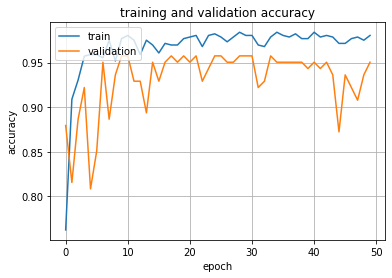

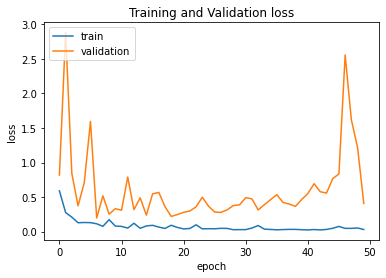

In [24]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
model_1.evaluate(X_test,Y_test,batch_size=6)

24/24 [==============================] - 3s 102ms/step - loss: 0.4067 - accuracy: 0.9504


[0.40673401951789856, 0.9503546357154846]

In [26]:
y_pred=model_1.predict(X_test)

In [27]:
Y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [28]:
#predict
y_pred=model_1.predict(X_test) # (n_images, 1)
y_classes = ((y_pred > 0.5)+0).ravel() 
#y_pred=np.argmax(y_pred,axis=1)
y_pred

array([[4.9261041e-03],
       [7.8333341e-02],
       [4.5585377e-08],
       [2.0081592e-03],
       [9.9960297e-01],
       [9.9820673e-01],
       [9.9179089e-01],
       [9.9994624e-01],
       [9.6158755e-01],
       [1.1512900e-06],
       [9.9981326e-01],
       [9.9141324e-01],
       [9.9959773e-01],
       [9.9693030e-01],
       [9.9988854e-01],
       [1.7561376e-03],
       [2.6304557e-05],
       [6.0685347e-06],
       [9.5070312e-03],
       [4.5889584e-04],
       [1.0563669e-02],
       [9.8703009e-01],
       [3.7808186e-05],
       [1.3289430e-07],
       [9.9788046e-01],
       [2.7357668e-03],
       [9.9997652e-01],
       [9.0634960e-01],
       [9.9995804e-01],
       [9.9678266e-01],
       [5.2270168e-01],
       [9.4310534e-01],
       [9.9881649e-01],
       [1.3392412e-06],
       [2.2509550e-03],
       [9.9904960e-01],
       [9.9981016e-01],
       [9.9788070e-01],
       [1.3716447e-03],
       [2.1282626e-04],
       [9.9929380e-01],
       [1.905672

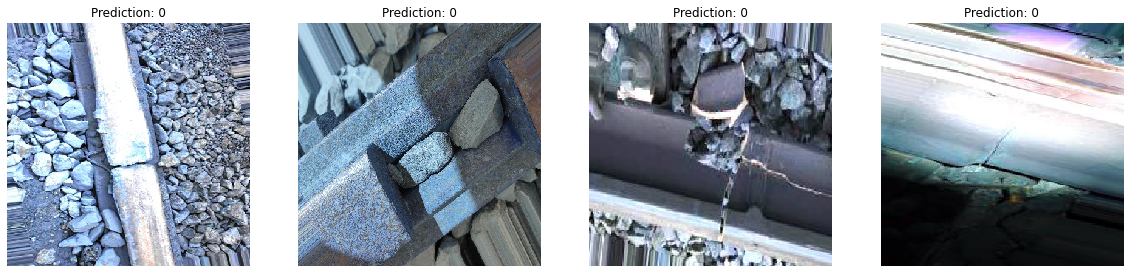

In [29]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
for ax, image, prediction in zip(axes, X_test, y_classes):
    ax.set_axis_off()
    #image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_classes,Y_test))

[[67  3]
 [ 4 67]]


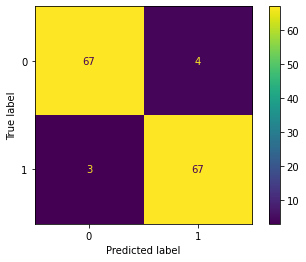

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_classes)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from sklearn import datasets, svm, metrics

In [33]:
#get classification report
print(classification_report(y_classes,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        70
           1       0.96      0.94      0.95        71

    accuracy                           0.95       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.95      0.95      0.95       141



In [34]:
cm = print(confusion_matrix(y_classes, Y_test))

[[67  3]
 [ 4 67]]


# Grad-Cam for inceptionResNet_V2

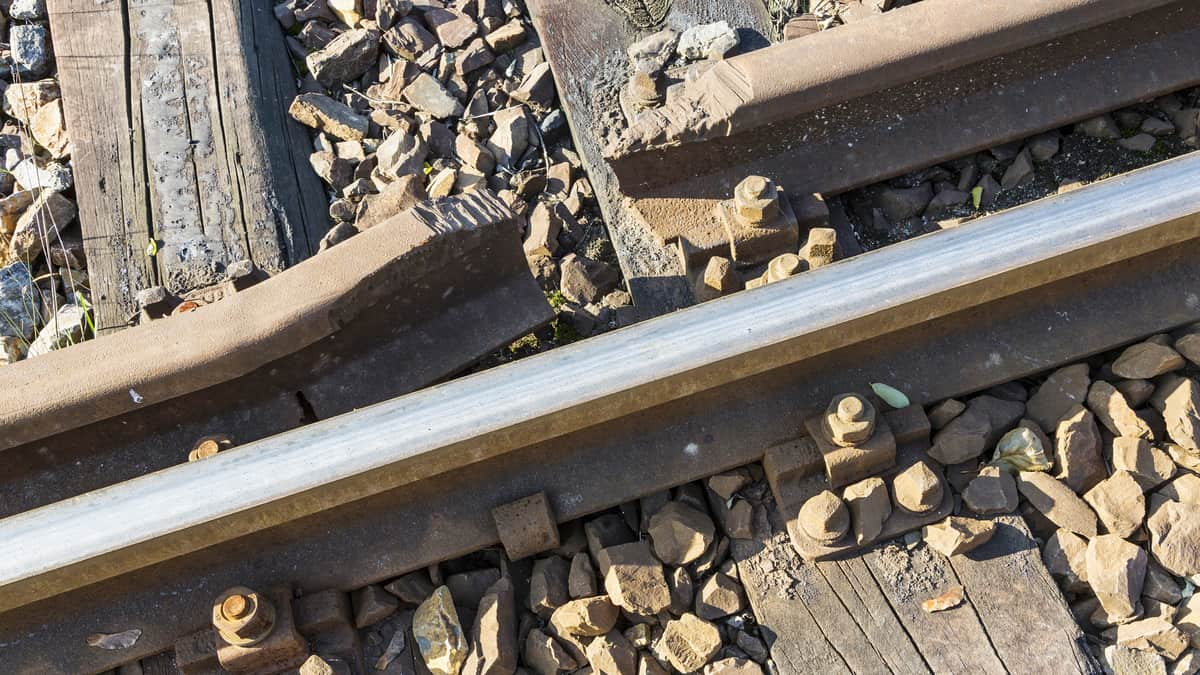

In [35]:
from IPython.display import Image, display

model_builder = keras.applications.inception_resnet_v2.InceptionResNetV2
img_size = (299, 299)
preprocess_input = keras.applications.inception_resnet_v2.preprocess_input
decode_predictions = keras.applications.inception_resnet_v2.decode_predictions

last_conv_layer_name = "conv_7b_ac"

# The local path to our target image
img_path = '../input/railway-data-imageslabels-incsv/Railway_data_images+labels/Broken_railroad_tracks_1.jpg'

display(Image(img_path))

In [36]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n04141327', 'scabbard', 7.991805)]


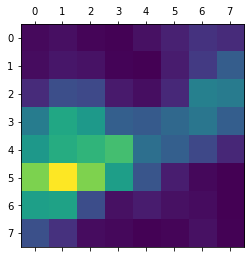

In [37]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

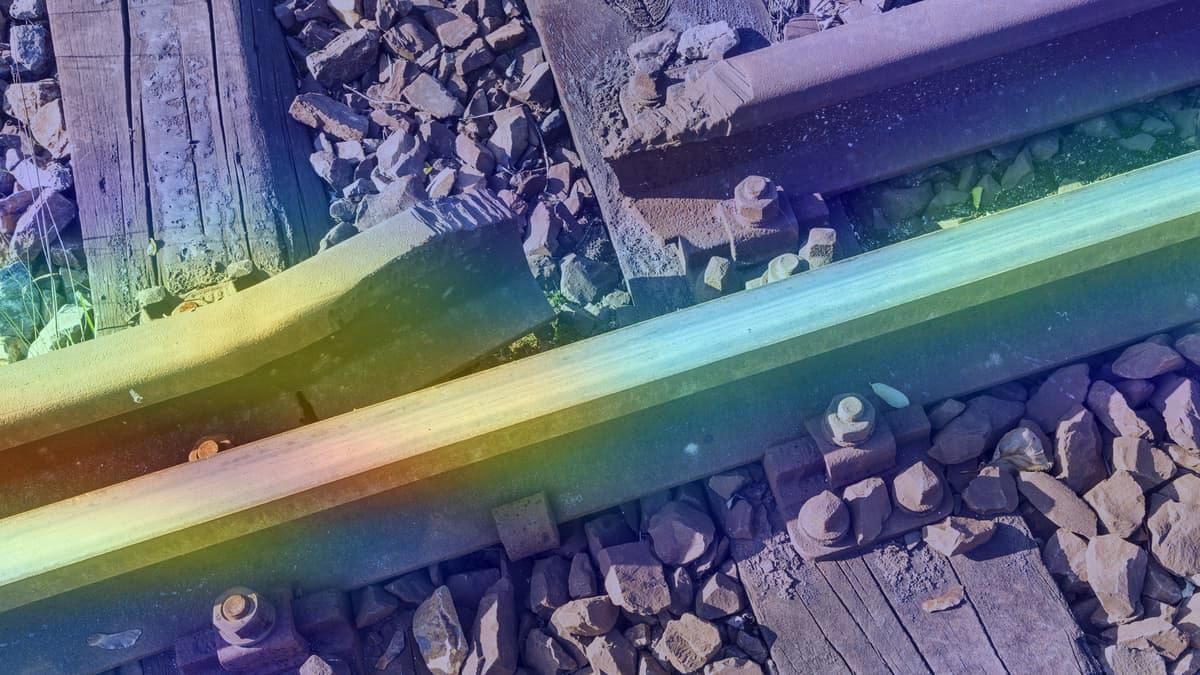

In [38]:
import matplotlib.cm as cm1

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm1.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

# inception_v3

In [39]:
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications import InceptionV3
# from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
model = InceptionV3()

from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, SimpleRNN, LSTM, GRU, Reshape, Concatenate,Bidirectional
from keras.applications.inception_v3 import preprocess_input
#rom keras.applications.vgg16 import preprocess_input


from keras.layers import GaussianNoise
#local_weights_file = '../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
f1_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(400,400,3))
#f1_base.load_weights(local_weights_file)
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

#f1_x = Reshape([1,2048])(f1_x)  
'''f1_x = SimpleRNN(2048, 
            return_sequences=False,                       
            #dropout=0.8                                     
            input_shape=[1,2048])(f1_x)
'''
#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
f1_x = Dense(1, activation='sigmoid')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d_703 (Conv2D)             (None, 199, 199, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_703 (BatchN (None, 199, 199, 32) 96          conv2d_703[0][0]                 
__________________________________________________________________________________________________
activation_703 (Activation)     (None, 199, 199, 32) 0           batch_normalization_703[0][0]    
___________________________

In [40]:
model_1.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
result = model_1.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=8, verbose=1)

2022-05-11 14:31:13.028052: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1075200000 exceeds 10% of free system memory.
2022-05-11 14:31:14.107129: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1075200000 exceeds 10% of free system memory.


Epoch 1/50
70/70 [==============================] - 20s 172ms/step - loss: 0.4993 - accuracy: 0.7964 - val_loss: 2.2169 - val_accuracy: 0.4965
Epoch 2/50
70/70 [==============================] - 10s 145ms/step - loss: 0.3119 - accuracy: 0.9071 - val_loss: 0.7278 - val_accuracy: 0.8582
Epoch 3/50
70/70 [==============================] - 10s 147ms/step - loss: 0.2143 - accuracy: 0.9250 - val_loss: 0.6214 - val_accuracy: 0.8652
Epoch 4/50
70/70 [==============================] - 10s 146ms/step - loss: 0.1703 - accuracy: 0.9429 - val_loss: 0.2958 - val_accuracy: 0.9291
Epoch 5/50
70/70 [==============================] - 10s 145ms/step - loss: 0.1948 - accuracy: 0.9357 - val_loss: 0.4981 - val_accuracy: 0.9220
Epoch 6/50
70/70 [==============================] - 10s 146ms/step - loss: 0.1350 - accuracy: 0.9482 - val_loss: 0.2781 - val_accuracy: 0.9078
Epoch 7/50
70/70 [==============================] - 11s 154ms/step - loss: 0.1935 - accuracy: 0.9429 - val_loss: 0.2340 - val_accuracy: 0.9291

In [42]:
import numpy as np
print(result.history['val_accuracy'])
print(np.mean(result.history['val_accuracy']))
print(np.max(result.history['val_accuracy']))
print(result.history['accuracy'])
print(np.mean(result.history['accuracy']))
print(np.max(result.history['accuracy']))

[0.4964539110660553, 0.8581560254096985, 0.8652482032775879, 0.9290780425071716, 0.9219858050346375, 0.9078013896942139, 0.9290780425071716, 0.9219858050346375, 0.936170220375061, 0.936170220375061, 0.936170220375061, 0.9078013896942139, 0.936170220375061, 0.914893627166748, 0.9290780425071716, 0.9078013896942139, 0.957446813583374, 0.9432623982429504, 0.9432623982429504, 0.9219858050346375, 0.957446813583374, 0.9503546357154846, 0.9432623982429504, 0.957446813583374, 0.8794326186180115, 0.9290780425071716, 0.9503546357154846, 0.914893627166748, 0.9290780425071716, 0.9432623982429504, 0.936170220375061, 0.936170220375061, 0.9219858050346375, 0.914893627166748, 0.9432623982429504, 0.9290780425071716, 0.9432623982429504, 0.936170220375061, 0.9290780425071716, 0.9503546357154846, 0.957446813583374, 0.957446813583374, 0.957446813583374, 0.9432623982429504, 0.9503546357154846, 0.9432623982429504, 0.9432623982429504, 0.9432623982429504, 0.9432623982429504, 0.914893627166748]
0.92297872602939

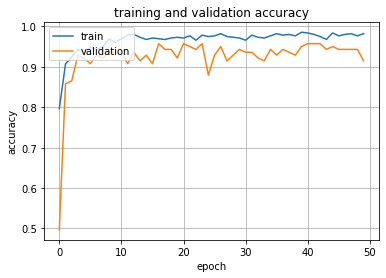

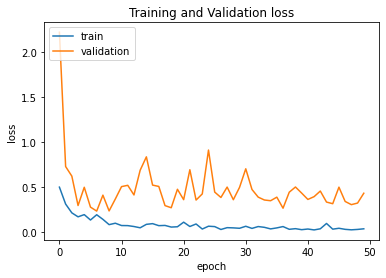

In [43]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
model_1.evaluate(X_test,Y_test,batch_size=6)

24/24 [==============================] - 1s 44ms/step - loss: 0.4319 - accuracy: 0.9149


[0.43193507194519043, 0.914893627166748]

In [45]:
y_pred=model_1.predict(X_test)
Y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [46]:
#predict
y_pred=model_1.predict(X_test) # (n_images, 1)
y_classes = ((y_pred > 0.5)+0).ravel() 
#y_pred=np.argmax(y_pred,axis=1)
y_pred

array([[4.8248458e-01],
       [7.3889769e-03],
       [3.2342406e-05],
       [2.8939159e-05],
       [9.9999940e-01],
       [9.9859482e-01],
       [8.6121666e-01],
       [9.9997675e-01],
       [5.4585373e-01],
       [4.3156958e-09],
       [9.9994755e-01],
       [9.8968291e-01],
       [9.9993002e-01],
       [9.9981135e-01],
       [9.8490566e-01],
       [4.4058315e-03],
       [6.2624820e-02],
       [5.8191776e-04],
       [8.7784432e-02],
       [9.1164920e-06],
       [3.4650144e-05],
       [5.3483844e-01],
       [1.2792707e-05],
       [1.1333080e-06],
       [9.9896908e-01],
       [2.4963866e-08],
       [9.9994719e-01],
       [3.2860675e-01],
       [9.9995422e-01],
       [9.9957591e-01],
       [5.6469148e-01],
       [9.9965465e-01],
       [9.9888915e-01],
       [6.8647889e-03],
       [2.2949447e-05],
       [9.9985230e-01],
       [9.9991310e-01],
       [9.9993277e-01],
       [2.0123653e-02],
       [9.1005219e-08],
       [9.8071629e-01],
       [9.562488

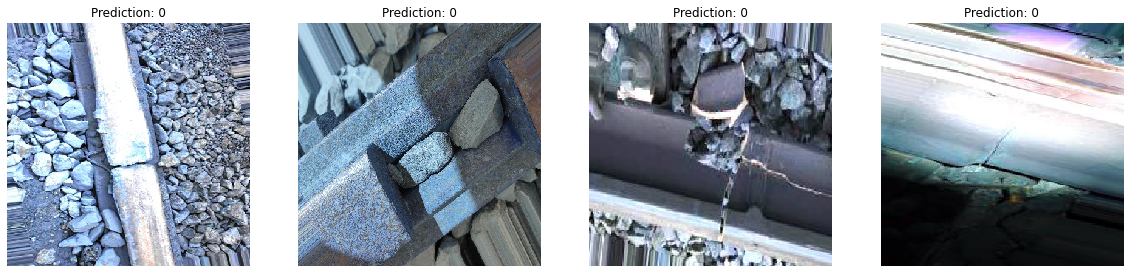

In [47]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
for ax, image, prediction in zip(axes, X_test, y_classes):
    ax.set_axis_off()
    #image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_classes,Y_test))

[[63  4]
 [ 8 66]]


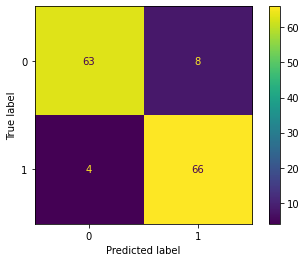

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_classes)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from sklearn import datasets, svm, metrics

In [51]:
#get classification report
print(classification_report(y_classes,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        67
           1       0.94      0.89      0.92        74

    accuracy                           0.91       141
   macro avg       0.92      0.92      0.91       141
weighted avg       0.92      0.91      0.91       141



In [52]:
cm1 = print(confusion_matrix(y_classes, Y_test))

[[63  4]
 [ 8 66]]


# Grad-Cam for inception_v3

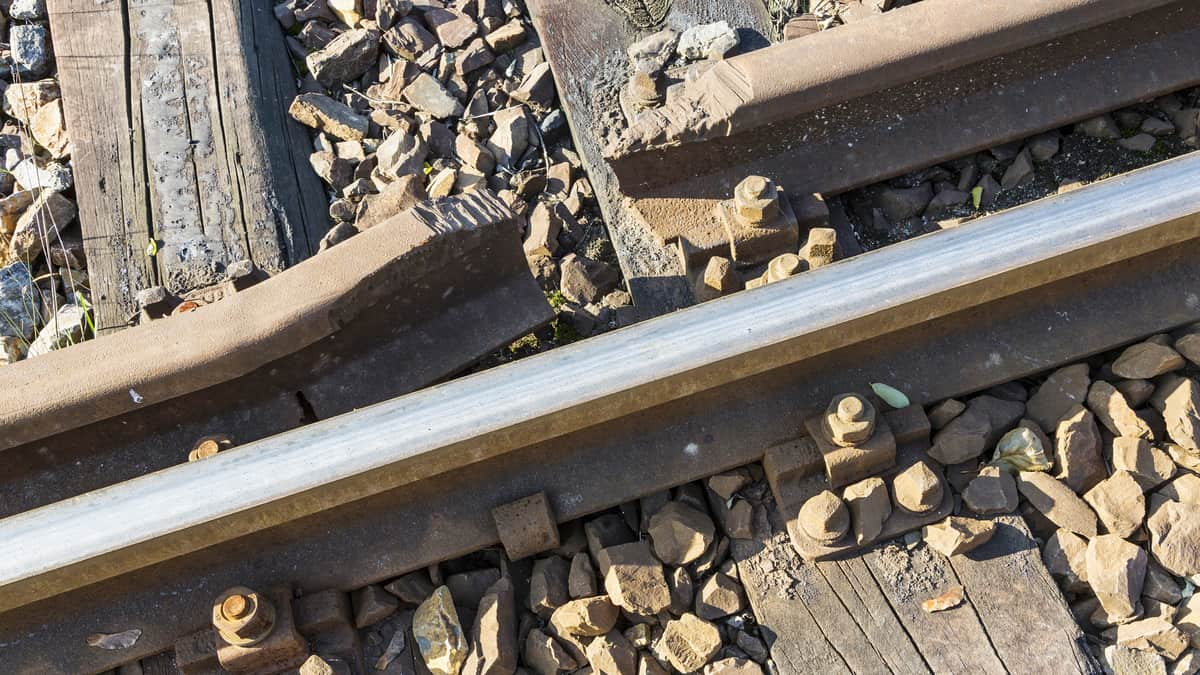

In [53]:
from IPython.display import Image, display

model_builder = keras.applications.inception_v3.InceptionV3
img_size = (299, 299)
preprocess_input = keras.applications.inception_v3.preprocess_input
decode_predictions = keras.applications.inception_v3.decode_predictions

last_conv_layer_name = "mixed10"

# The local path to our target image
img_path = '../input/railway-data-imageslabels-incsv/Railway_data_images+labels/Broken_railroad_tracks_1.jpg'

display(Image(img_path))

In [54]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [('n04435653', 'tile_roof', 7.9840775)]


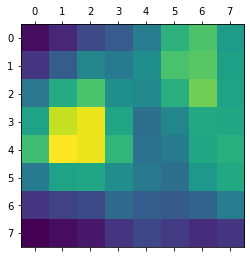

In [55]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

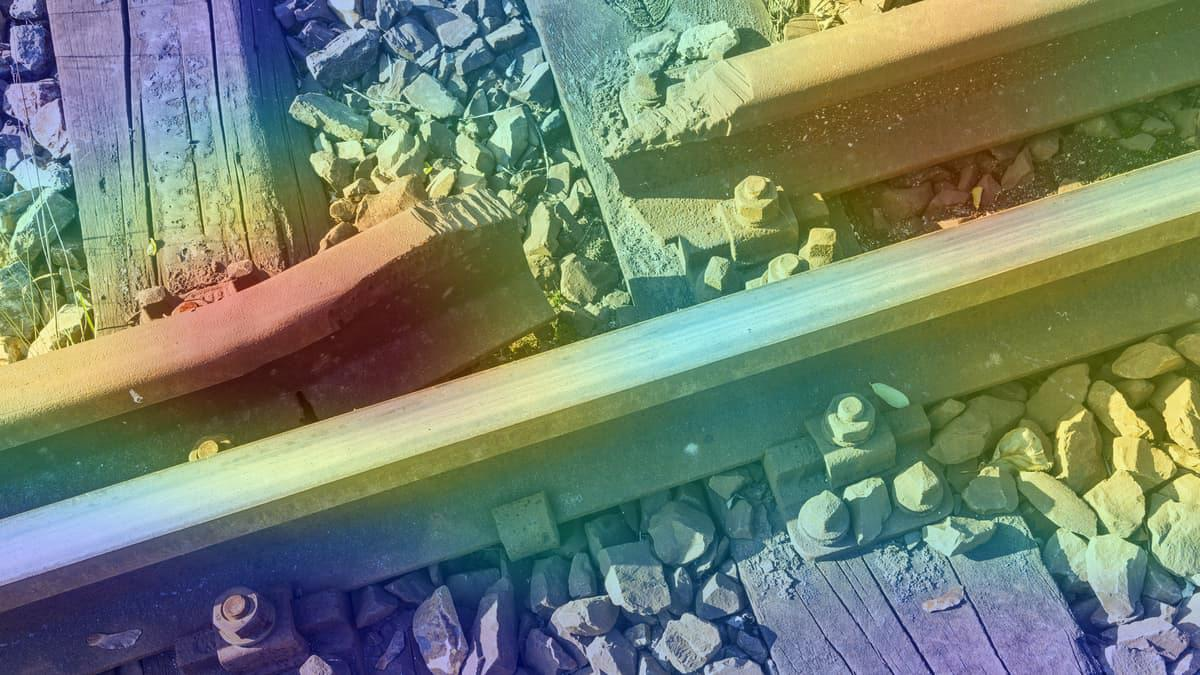

In [56]:
import matplotlib.cm as cm1

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm1.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

## Xception

In [79]:
import tensorflow as tf
import keras
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from keras.applications.xception import Xception
# model = VGG16(include_top=False, input_shape=(224,224,3),weights="imagenet")

from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, SimpleRNN, LSTM, GRU, Reshape, Concatenate,Bidirectional
#from keras.applications.MobileNet import preprocess_input
from keras.applications.resnet import preprocess_input


from keras.layers import GaussianNoise
#local_weights_file = '../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
f1_base = Xception(weights='imagenet', include_top=False, input_shape=(400,400,3))
#f1_base.load_weights(local_weights_file)
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
#f1_x = Dense(1, activation='relu')(f1_x)
f1_x = Dense(1, activation='sigmoid')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 199, 199, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 199, 199, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 199, 199, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [80]:
model_1.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
result = model_1.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=8, verbose=1)

Epoch 1/50
70/70 [==============================] - 33s 392ms/step - loss: 0.3999 - accuracy: 0.8286 - val_loss: 0.6123 - val_accuracy: 0.8865
Epoch 2/50
70/70 [==============================] - 26s 373ms/step - loss: 0.1784 - accuracy: 0.9375 - val_loss: 1.3261 - val_accuracy: 0.8085
Epoch 3/50
70/70 [==============================] - 26s 373ms/step - loss: 0.1202 - accuracy: 0.9607 - val_loss: 0.5386 - val_accuracy: 0.9291
Epoch 4/50
70/70 [==============================] - 26s 373ms/step - loss: 0.1404 - accuracy: 0.9464 - val_loss: 0.4317 - val_accuracy: 0.9291
Epoch 5/50
70/70 [==============================] - 26s 374ms/step - loss: 0.0870 - accuracy: 0.9625 - val_loss: 0.2580 - val_accuracy: 0.9504
Epoch 6/50
70/70 [==============================] - 26s 373ms/step - loss: 0.0650 - accuracy: 0.9750 - val_loss: 0.3183 - val_accuracy: 0.9433
Epoch 7/50
70/70 [==============================] - 26s 373ms/step - loss: 0.0699 - accuracy: 0.9714 - val_loss: 0.4828 - val_accuracy: 0.9433

In [82]:
import numpy as np
print(result.history['val_accuracy'])
print(np.mean(result.history['val_accuracy']))
print(np.max(result.history['val_accuracy']))
print(result.history['accuracy'])
print(np.mean(result.history['accuracy']))
print(np.max(result.history['accuracy']))

[0.8865247964859009, 0.8085106611251831, 0.9290780425071716, 0.9290780425071716, 0.9503546357154846, 0.9432623982429504, 0.9432623982429504, 0.9432623982429504, 0.9219858050346375, 0.9503546357154846, 0.9503546357154846, 0.9432623982429504, 0.9503546357154846, 0.9503546357154846, 0.957446813583374, 0.9503546357154846, 0.9290780425071716, 0.9432623982429504, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.9432623982429504, 0.9503546357154846, 0.9503546357154846, 0.957446813583374, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.936170220375061, 0.9432623982429504, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.957446813583374, 0.9503546357154846, 0.9503546357154846, 0.9503546357154846, 0.936170220375061, 0.9432623982429504, 0.9503546357154846, 0.957446813583374, 0.957446813583374, 0.9503546357154846, 0.9503546357154846, 0.936170220375061, 0.9503546357154846, 0.9503546357154846, 0.957446813583374, 0.957446813583374]
0.9434042

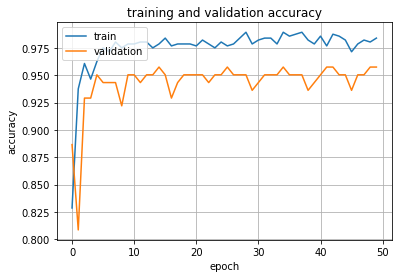

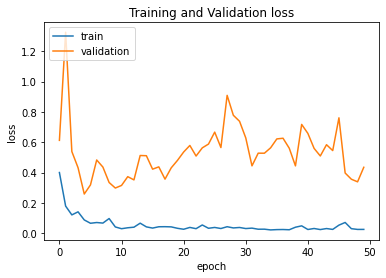

In [83]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [84]:
model_1.evaluate(X_test,Y_test,batch_size=6)

24/24 [==============================] - 2s 55ms/step - loss: 0.4346 - accuracy: 0.9574


[0.4345776438713074, 0.957446813583374]

In [85]:
y_pred=model_1.predict(X_test)

In [86]:
Y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [87]:
#predict
y_pred=model_1.predict(X_test) # (n_images, 1)
y_classes = ((y_pred > 0.5)+0).ravel() 
#y_pred=np.argmax(y_pred,axis=1)
y_pred

array([[4.54732683e-03],
       [7.97429401e-03],
       [9.31037812e-06],
       [5.64093034e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99999762e-01],
       [1.00000000e+00],
       [9.97187912e-01],
       [1.05822684e-04],
       [9.99999881e-01],
       [9.80914235e-01],
       [1.00000000e+00],
       [9.99999881e-01],
       [1.00000000e+00],
       [1.29207270e-03],
       [3.74703450e-06],
       [6.02329336e-03],
       [4.50841617e-03],
       [1.34951912e-03],
       [1.76135436e-04],
       [9.99988198e-01],
       [2.39892134e-11],
       [1.17756747e-06],
       [1.00000000e+00],
       [1.30733056e-07],
       [9.99976516e-01],
       [9.99975562e-01],
       [9.99989390e-01],
       [1.00000000e+00],
       [4.99123335e-01],
       [9.99988914e-01],
       [1.00000000e+00],
       [5.50027289e-06],
       [1.31149582e-05],
       [1.00000000e+00],
       [9.99999285e-01],
       [9.99999642e-01],
       [2.51092729e-08],
       [1.02191571e-11],


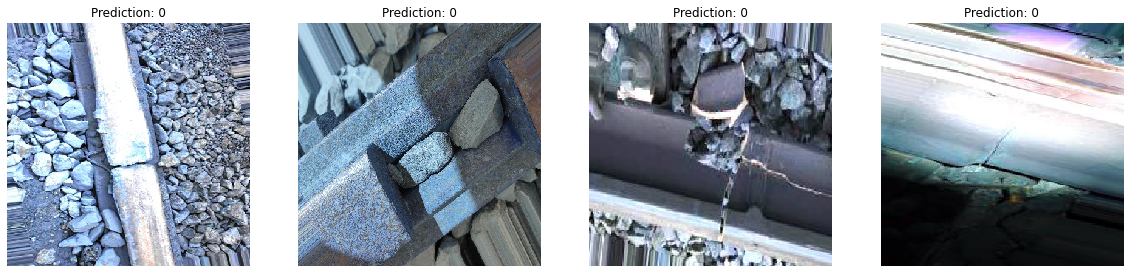

In [88]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
for ax, image, prediction in zip(axes, X_test, y_classes):
    ax.set_axis_off()
    #image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_classes,Y_test))

[[68  3]
 [ 3 67]]


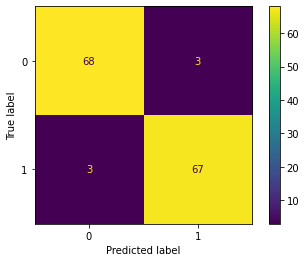

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_classes)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from sklearn import datasets, svm, metrics

In [92]:
#get classification report
print(classification_report(y_classes,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.96      0.96      0.96        70

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141



In [93]:
cm = print(confusion_matrix(y_classes, Y_test))

[[68  3]
 [ 3 67]]


# Grad-Cam for Xception

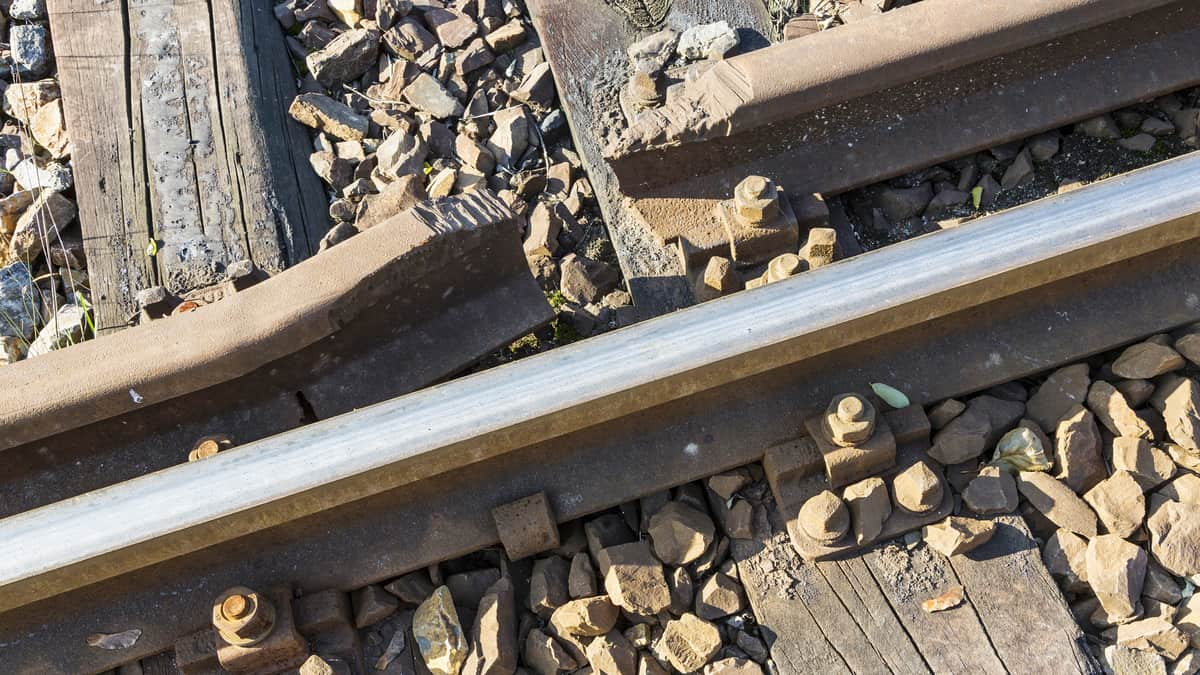

In [103]:
from IPython.display import Image, display

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

#last_conv_layer_name = "block14_sepconv2_act"
last_conv_layer_name = 'block14_sepconv2_act'
# The local path to our target image
img_path = '../input/railway-data-imageslabels-incsv/Railway_data_images+labels/Broken_railroad_tracks_1.jpg'

display(Image(img_path))

In [104]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [('n04435653', 'tile_roof', 7.154948)]


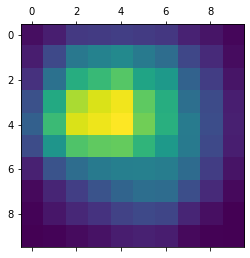

In [105]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

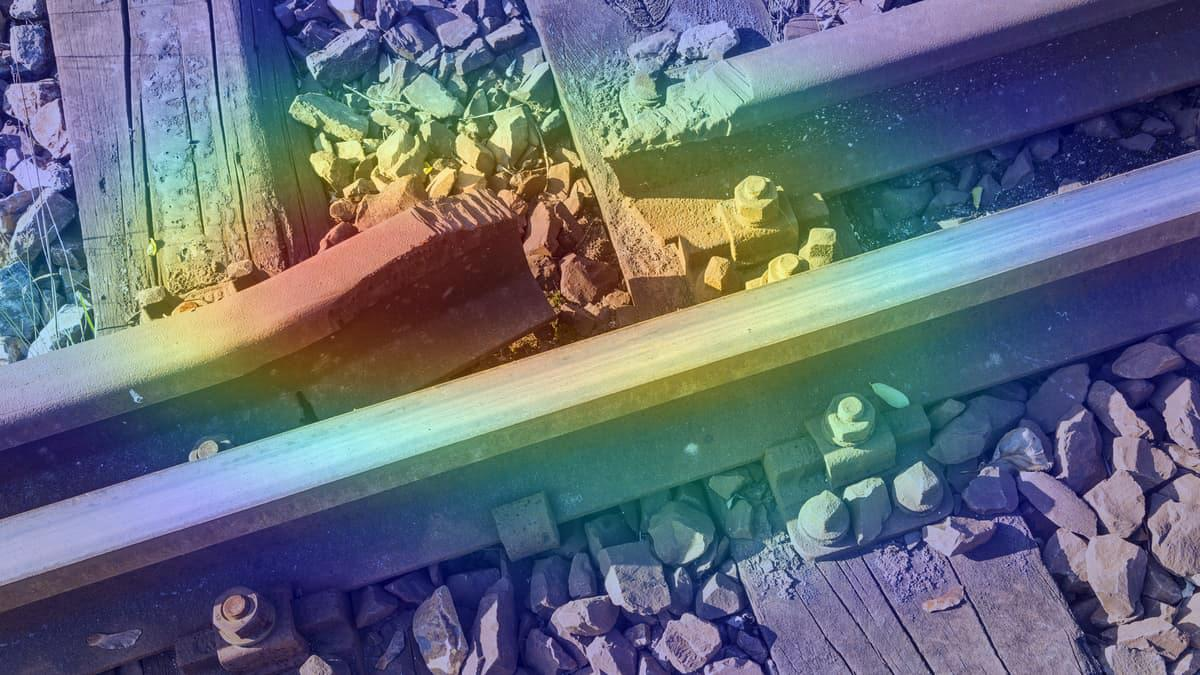

In [106]:
import matplotlib.cm as cm1

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm1.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [107]:
# Load the library
from tensorflow.keras.models import load_model
# Save the model
model_1.save('rail.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
